In [298]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

missing_values = ["n/a", "na", "--","NaN","Na"]
dataset=pd.read_csv('wine.csv',na_values = missing_values)

In [299]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [300]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [301]:
le = preprocessing.LabelEncoder()
dataset.quality = le.fit_transform(dataset.quality)

In [302]:
X=dataset.iloc[:, :-1].values
y=dataset.iloc[:, 11].values

In [303]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [304]:
y

array([0, 0, 0, ..., 1, 0, 1])

In [305]:
from sklearn.model_selection import cross_val_score
decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
scores = cross_val_score(decision_tree, X, y, cv=500)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.75 accuracy with a standard deviation of 0.25


In [306]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [307]:
decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
model = decision_tree.fit(X_train, y_train)
y_pred=decision_tree.predict(X_test)


In [308]:
metrics.accuracy_score(y_test, y_pred)

0.7625

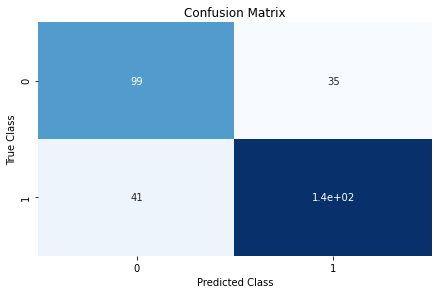

In [309]:
from sklearn.metrics import confusion_matrix
class_names=[0,1]
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [310]:
matrix

array([[ 99,  35],
       [ 41, 145]], dtype=int64)

In [348]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
report=classification_report(y_test, y_pred, target_names=target_names)

In [349]:
print(report)

              precision    recall  f1-score   support

           0       0.67      0.68      0.67       143
           1       0.74      0.73      0.73       177

    accuracy                           0.71       320
   macro avg       0.70      0.70      0.70       320
weighted avg       0.71      0.71      0.71       320



In [314]:
decision_tree1 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
model = decision_tree1.fit(X_train, y_train)
y_pred=decision_tree1.predict(X_test)


In [315]:
metrics.accuracy_score(y_test, y_pred)

0.765625

In [350]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.67      0.68      0.67       143
           1       0.74      0.73      0.73       177

    accuracy                           0.71       320
   macro avg       0.70      0.70      0.70       320
weighted avg       0.71      0.71      0.71       320



In [319]:
import statsmodels.formula.api as sm
X=np.append(arr=np.ones((1599,1)).astype(int), values=X, axis=1)

In [320]:
import statsmodels.api as sm
X_opt=X[:, [0,1,2,3,4,5,6,7,8,9]]

In [321]:
classifier_OLS=sm.OLS(endog=y,exog=X_opt).fit()
classifier_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     49.08
Date:                Sun, 10 Jan 2021   Prob (F-statistic):           1.37e-78
Time:                        01:27:17   Log-Likelihood:                -960.56
No. Observations:                1599   AIC:                             1941.
Df Residuals:                    1589   BIC:                             1995.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.7653      9.420     10.166      0.000      77.288     114.243
x1             0.1057      0.015      7.103      0.000       0.077       0.135
x2            -0.6620      0.081     -8.186      0.000      -0.821      -0.503
x3             0.0067      0.099      0.068      0.946      -0.188       0.201
x4             0.0457      0.009      5.172      0.000       0.028       0.063
x5            -0.0926      0.268     -0.345      0.730      -0.619       0.433
x6             0.0048      0.001      3.249      0.001       0.002       0.008
x7            -0.0035      0.000     -6.970      0.000      -0.004      -0.002
x8           -97.8790      9.664    -10.128      0.000    -116.835     -78.923
x9             0.5359      0.112      4.796      0.000       0.317       0.755
==============================================================================
Omnibus:                      788.920   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.996
Skew:                          -0.052   Prob(JB):                     1.29e-19
Kurtosis:                       1.862   Cond. No.                     7.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [322]:
X_opt=X[:, [0,1,2,4,5,6,7,8,9]]
classifier_OLS=sm.OLS(endog=y,exog=X_opt).fit()
classifier_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     55.25
Date:                Sun, 10 Jan 2021   Prob (F-statistic):           1.79e-79
Time:                        01:27:17   Log-Likelihood:                -960.56
No. Observations:                1599   AIC:                             1939.
Df Residuals:                    1590   BIC:                             1988.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.8654      9.300     10.308      0.000      77.624     114.107
x1             0.1062      0.013      8.251      0.000       0.081       0.131
x2            -0.6650      0.067     -9.913      0.000      -0.797      -0.533
x3             0.0458      0.009      5.240      0.000       0.029       0.063
x4            -0.0872      0.256     -0.341      0.733      -0.589       0.415
x5             0.0048      0.001      3.284      0.001       0.002       0.008
x6            -0.0034      0.000     -7.198      0.000      -0.004      -0.003
x7           -97.9824      9.539    -10.271      0.000    -116.693     -79.271
x8             0.5363      0.112      4.808      0.000       0.318       0.755
==============================================================================
Omnibus:                      787.918   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.976
Skew:                          -0.052   Prob(JB):                     1.30e-19
Kurtosis:                       1.862   Cond. No.                     7.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [323]:
X_opt=X[:, [0,1,2,4,6,7,8,9]]
classifier_OLS=sm.OLS(endog=y,exog=X_opt).fit()
classifier_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     63.16
Date:                Sun, 10 Jan 2021   Prob (F-statistic):           2.29e-80
Time:                        01:27:17   Log-Likelihood:                -960.62
No. Observations:                1599   AIC:                             1937.
Df Residuals:                    1591   BIC:                             1980.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.6208      9.029     10.701      0.000      78.910     114.332
x1             0.1073      0.012      8.621      0.000       0.083       0.132
x2            -0.6663      0.067     -9.948      0.000      -0.798      -0.535
x3             0.0460      0.009      5.268      0.000       0.029       0.063
x4             0.0048      0.001      3.275      0.001       0.002       0.008
x5            -0.0034      0.000     -7.193      0.000      -0.004      -0.002
x6           -98.8000      9.230    -10.704      0.000    -116.904     -80.696
x7             0.5492      0.105      5.236      0.000       0.343       0.755
==============================================================================
Omnibus:                      781.138   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.767
Skew:                          -0.051   Prob(JB):                     1.44e-19
Kurtosis:                       1.863   Cond. No.                     7.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [324]:
X_train,X_test,y_train,y_test=train_test_split(X_opt,y,test_size=0.2)

In [325]:
decision_tree1 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
model = decision_tree1.fit(X_train, y_train)
y_pred=decision_tree1.predict(X_test)

In [326]:
metrics.accuracy_score(y_test, y_pred)

0.665625

In [330]:
path = decision_tree1.cost_complexity_pruning_path(X_train, y_train)

In [331]:
path

{'ccp_alphas': array([0.        , 0.00126861, 0.00141112, 0.00141112, 0.00141112,
        0.00152468, 0.00156372, 0.00156372, 0.00156372, 0.00156372,
        0.00156372, 0.00156372, 0.00156372, 0.00156372, 0.00156372,
        0.00156372, 0.00161912, 0.00163039, 0.00167452, 0.00167452,
        0.00189787, 0.00189787, 0.00196229, 0.00209851, 0.00214498,
        0.00215394, 0.00215394, 0.00215394, 0.00215394, 0.00215394,
        0.00215394, 0.00215394, 0.00215394, 0.00221616, 0.00222409,
        0.00231884, 0.00231884, 0.00232654, 0.00234558, 0.00241295,
        0.00248596, 0.00249978, 0.00253723, 0.00253723, 0.00253723,
        0.00253723, 0.00253723, 0.00253723, 0.00253723, 0.00253723,
        0.00256994, 0.00256994, 0.0025731 , 0.00257925, 0.00268627,
        0.00270916, 0.00273504, 0.00279795, 0.00282224, 0.00282224,
        0.00282224, 0.00285495, 0.00288454, 0.00290708, 0.00296474,
        0.00297115, 0.00302489, 0.00303323, 0.00304223, 0.00304936,
        0.00304936, 0.00306824, 0.

Text(0, 0.5, 'total impurity of leaves')

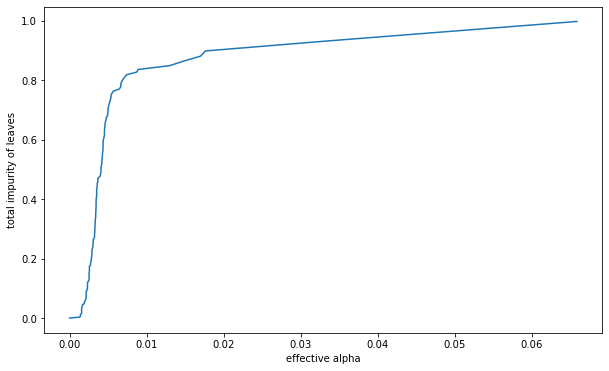

In [332]:

ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.figure(figsize=(10, 6))+
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

In [333]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='entropy',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)


Text(0, 0.5, 'total depth')

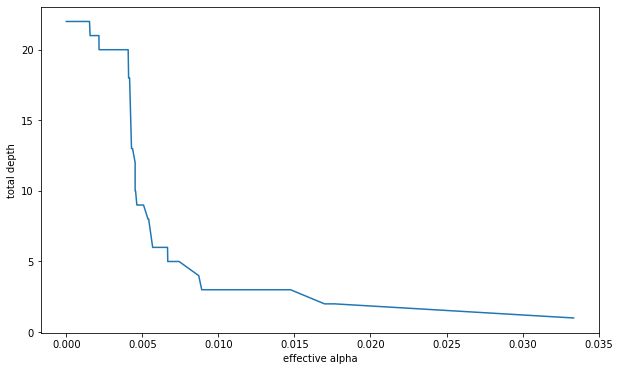

In [334]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

In [335]:
acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

Text(0, 0.5, 'Accuracy scores')

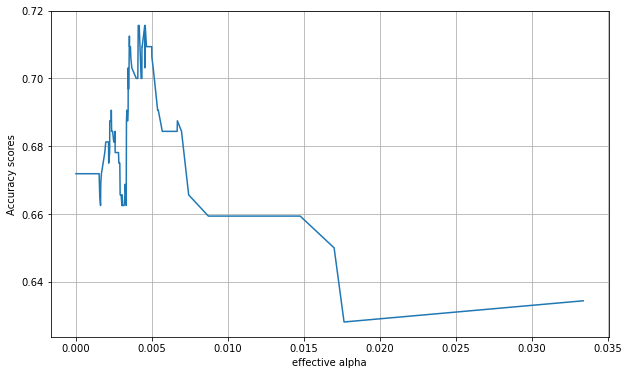

In [358]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

In [361]:
decision_tree1 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0045)
model = decision_tree1.fit(X_train, y_train)
y_pred=decision_tree1.predict(X_test)

In [362]:
metrics.accuracy_score(y_test, y_pred)

0.709375